In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
import numpy as np

In [2]:
ipl_auction_df = pd.read_csv("IPL IMB381IPL2013.csv")

pd.set_option('display.max_columns',7) # number of columns to display

print("display 5 rows:")

ipl_auction_df.head(5)


display 5 rows:


,Sl.NO.,PLAYER NAME,AGE,...,AUCTION YEAR,BASE PRICE,SOLD PRICE
0,1,"Abdulla, YA",2,...,2009,50000,50000
1,2,Abdur Razzak,2,...,2008,50000,50000
2,3,"Agarkar, AB",2,...,2008,200000,350000
3,4,"Ashwin, R",1,...,2011,100000,850000
4,5,"Badrinath, S",2,...,2011,100000,800000


In [3]:
ipl_auction_df.columns

Index(['Sl.NO.', 'PLAYER NAME', 'AGE', 'COUNTRY', 'TEAM', 'PLAYING ROLE',
       'T-RUNS', 'T-WKTS', 'ODI-RUNS-S', 'ODI-SR-B', 'ODI-WKTS', 'ODI-SR-BL',
       'CAPTAINCY EXP', 'RUNS-S', 'HS', 'AVE', 'SR-B', 'SIXERS', 'RUNS-C',
       'WKTS', 'AVE-BL', 'ECON', 'SR-BL', 'AUCTION YEAR', 'BASE PRICE',
       'SOLD PRICE'],
      dtype='object')

In [4]:
# features that can used to predict sold price

X_features = ['AGE', 'COUNTRY', 'PLAYING ROLE', 'T-RUNS', 'T-WKTS', 'ODI-RUNS-S', 'ODI-SR-B', 'ODI-WKTS', 'ODI-SR-BL', 'CAPTAINCY EXP', 'RUNS-S', 'HS', 'AVE', 'SR-B', 'SIXERS', 'RUNS-C', 'WKTS', 'AVE-BL', 'ECON', 'SR-BL']

# Encoding Categorical Features

In [5]:
ipl_auction_df[['AGE', 'COUNTRY', 'PLAYING ROLE', 'CAPTAINCY EXP']]

,AGE,COUNTRY,PLAYING ROLE,CAPTAINCY EXP
0,2,SA,Allrounder,0
1,2,BAN,Bowler,0
2,2,IND,Bowler,0
3,1,IND,Bowler,0
4,2,IND,Batsman,0
...,...,...,...,...
125,2,IND,Batsman,0
126,2,PAK,Batsman,1
127,2,IND,Batsman,1
128,2,IND,Bowler,0


In [6]:
# Encoding Categorical Features
ipl_auction_df['PLAYING ROLE'].unique()

array(['Allrounder', 'Bowler', 'Batsman', 'W. Keeper'], dtype=object)

In [7]:
pd.get_dummies(ipl_auction_df['PLAYING ROLE'])[0:5]

,Allrounder,Batsman,Bowler,W. Keeper
0,1,0,0,0
1,0,0,1,0
2,0,0,1,0
3,0,0,1,0
4,0,1,0,0


In [8]:
categorical_features = ['AGE', 'COUNTRY', 'PLAYING ROLE', 'CAPTAINCY EXP']

ipl_auction_encoded_df = pd.get_dummies( ipl_auction_df[X_features],columns = categorical_features,drop_first = True )


In [9]:
ipl_auction_encoded_df.columns

Index(['T-RUNS', 'T-WKTS', 'ODI-RUNS-S', 'ODI-SR-B', 'ODI-WKTS', 'ODI-SR-BL',
       'RUNS-S', 'HS', 'AVE', 'SR-B', 'SIXERS', 'RUNS-C', 'WKTS', 'AVE-BL',
       'ECON', 'SR-BL', 'AGE_2', 'AGE_3', 'COUNTRY_BAN', 'COUNTRY_ENG',
       'COUNTRY_IND', 'COUNTRY_NZ', 'COUNTRY_PAK', 'COUNTRY_SA', 'COUNTRY_SL',
       'COUNTRY_WI', 'COUNTRY_ZIM', 'PLAYING ROLE_Batsman',
       'PLAYING ROLE_Bowler', 'PLAYING ROLE_W. Keeper', 'CAPTAINCY EXP_1'],
      dtype='object')

In [10]:

X_features = ipl_auction_encoded_df.columns

In [11]:
X_features

Index(['T-RUNS', 'T-WKTS', 'ODI-RUNS-S', 'ODI-SR-B', 'ODI-WKTS', 'ODI-SR-BL',
       'RUNS-S', 'HS', 'AVE', 'SR-B', 'SIXERS', 'RUNS-C', 'WKTS', 'AVE-BL',
       'ECON', 'SR-BL', 'AGE_2', 'AGE_3', 'COUNTRY_BAN', 'COUNTRY_ENG',
       'COUNTRY_IND', 'COUNTRY_NZ', 'COUNTRY_PAK', 'COUNTRY_SA', 'COUNTRY_SL',
       'COUNTRY_WI', 'COUNTRY_ZIM', 'PLAYING ROLE_Batsman',
       'PLAYING ROLE_Bowler', 'PLAYING ROLE_W. Keeper', 'CAPTAINCY EXP_1'],
      dtype='object')

# Split into Train and Test (Validation) sets

In [12]:
import statsmodels.api as sm

In [13]:
# y = b0*1 + b1*a + b2*b | y = b1 * x + b0 * 1

X = sm.add_constant(ipl_auction_encoded_df) 
Y = ipl_auction_df['SOLD PRICE']

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
train_X, test_X, train_y, test_y = train_test_split(X, Y, train_size = 0.8, random_state = 42) # train set - 80%

# Fitting the Model

In [16]:
ipl_model_1 = sm.OLS(train_y, train_X).fit()
ipl_model_1.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                            Results: Ordinary least squares
========================================================================================
Model:                     OLS                     Adj. R-squared:            0.362     
Dependent Variable:        SOLD PRICE              AIC:                       2965.2841 
Date:                      2022-09-22 13:49        BIC:                       3049.9046 
No. Observations:          104                     Log-Likelihood:            -1450.6   
Df Model:                  31                      F-statistic:               2.883     
Df Residuals:              72                      Prob (F-statistic):        0.000114  
R-squared:                 0.554                   Scale:                     1.1034e+11
----------------------------------------------------------------------------------------
                          Coef.       Std.Err.     t    P>|t|     [0.025       0.975]   
----------------------------------------------------------------------------------------
const                   375827.1991 228849.9306  1.6422 0.1049  -80376.7996  832031.1978
T-RUNS                     -53.7890     32.7172 -1.6441 0.1045    -119.0096      11.4316
T-WKTS                    -132.5967    609.7525 -0.2175 0.8285   -1348.1162    1082.9228
ODI-RUNS-S                  57.9600     31.5071  1.8396 0.0700      -4.8482     120.7681
ODI-SR-B                  -524.1450   1576.6368 -0.3324 0.7405   -3667.1130    2618.8231
ODI-WKTS                   815.3944    832.3883  0.9796 0.3306    -843.9413    2474.7301
ODI-SR-BL                 -773.3092   1536.3334 -0.5033 0.6163   -3835.9338    2289.3154
RUNS-S                     114.7205    173.3088  0.6619 0.5101    -230.7643     460.2054
HS                       -5516.3354   2586.3277 -2.1329 0.0363  -10672.0855    -360.5853
AVE                      21560.2760   7774.2419  2.7733 0.0071    6062.6080   37057.9439
SR-B                     -1324.7218   1373.1303 -0.9647 0.3379   -4062.0071    1412.5635
SIXERS                    4264.1001   4089.6000  1.0427 0.3006   -3888.3685   12416.5687
RUNS-C                      69.8250    297.6697  0.2346 0.8152    -523.5687     663.2187
WKTS                      3075.2422   7262.4452  0.4234 0.6732  -11402.1778   17552.6622
AVE-BL                    5182.9335  10230.1581  0.5066 0.6140  -15210.5140   25576.3810
ECON                     -6820.7781  13109.3693 -0.5203 0.6045  -32953.8282   19312.2721
SR-BL                    -7658.8094  14041.8735 -0.5454 0.5871  -35650.7726   20333.1539
AGE_2                  -230767.6463 114117.2005 -2.0222 0.0469 -458256.1279   -3279.1648
AGE_3                  -216827.0808 152246.6232 -1.4242 0.1587 -520325.1772   86671.0155
COUNTRY_BAN            -122103.5196 438719.2796 -0.2783 0.7816 -996674.4194  752467.3801
COUNTRY_ENG             672410.7654 238386.2220  2.8207 0.0062  197196.5172 1147625.0135
COUNTRY_IND             155306.4011 126316.3449  1.2295 0.2229  -96500.6302  407113.4325
COUNTRY_NZ              194218.9120 173491.9293  1.1195 0.2667 -151630.9280  540068.7521
COUNTRY_PAK              75921.7670 193463.5545  0.3924 0.6959 -309740.7804  461584.3143
COUNTRY_SA               64283.3894 144587.6773  0.4446 0.6579 -223946.8775  352513.6563
COUNTRY_SL               17360.1530 176333.7497  0.0985 0.9218 -334154.7526  368875.0586
COUNTRY_WI               10607.7792 230686.7892  0.0460 0.9635 -449257.9303  470473.4887
COUNTRY_ZIM            -145494.4793 401505.2815 -0.3624 0.7181 -945880.6296  654891.6710
PLAYING ROLE_Batsman     75724.7643 150250.0240  0.5040 0.6158 -223793.1844  375242.7130
PLAYING ROLE_Bowler      15395.8752 126308.1272  0.1219 0.9033 -236394.7744  267186.5249
PLAYING ROLE_W. Keeper  -71358.6280 213585.7444 -0.3341 0.7393 -497134.0278  354416.7718
CAPTAINCY EXP_1         164113.3972 123430.6353  1.3296 0.1878  -81941.0772  410167.8716
----------------------------------------------------------------

In [17]:
ipl_model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             SOLD PRICE   R-squared:                       0.554
Model:                            OLS   Adj. R-squared:                  0.362
Method:                 Least Squares   F-statistic:                     2.883
Date:                Thu, 22 Sep 2022   Prob (F-statistic):           0.000114
Time:                        13:49:06   Log-Likelihood:                -1450.6
No. Observations:                 104   AIC:                             2965.
Df Residuals:                      72   BIC:                             3050.
Df Model:                          31                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                   3.758e+05   2.29e+05      1.642      0.105   -8.04e+04    8.32e+05
T-RUNS                   -53.7890     32.717     -1.644      0.105    -119.010      11.432
T-WKTS                  -132.5967    609.753     -0.217      0.828   -1348.116    1082.923
ODI-RUNS-S                57.9600     31.507      1.840      0.070      -4.848     120.768
ODI-SR-B                -524.1450   1576.637     -0.332      0.741   -3667.113    2618.823
ODI-WKTS                 815.3944    832.388      0.980      0.331    -843.941    2474.730
ODI-SR-BL               -773.3092   1536.333     -0.503      0.616   -3835.934    2289.315
RUNS-S                   114.7205    173.309      0.662      0.510    -230.764     460.205
HS                     -5516.3354   2586.328     -2.133      0.036   -1.07e+04    -360.585
AVE                     2.156e+04   7774.242      2.773      0.007    6062.608    3.71e+04
SR-B                   -1324.7218   1373.130     -0.965      0.338   -4062.007    1412.564
SIXERS                  4264.1001   4089.600      1.043      0.301   -3888.368    1.24e+04
RUNS-C                    69.8250    297.670      0.235      0.815    -523.569     663.219
WKTS                    3075.2422   7262.445      0.423      0.673   -1.14e+04    1.76e+04
AVE-BL                  5182.9335   1.02e+04      0.507      0.614   -1.52e+04    2.56e+04
ECON                   -6820.7781   1.31e+04     -0.520      0.604    -3.3e+04    1.93e+04
SR-BL                  -7658.8094    1.4e+04     -0.545      0.587   -3.57e+04    2.03e+04
AGE_2                  -2.308e+05   1.14e+05     -2.022      0.047   -4.58e+05   -3279.165
AGE_3                  -2.168e+05   1.52e+05     -1.424      0.159    -5.2e+05    8.67e+04
COUNTRY_BAN            -1.221e+05   4.39e+05     -0.278      0.782   -9.97e+05    7.52e+05
COUNTRY_ENG             6.724e+05   2.38e+05      2.821      0.006    1.97e+05    1.15e+06
COUNTRY_IND             1.553e+05   1.26e+05      1.230      0.223   -9.65e+04    4.07e+05
COUNTRY_NZ              1.942e+05   1.73e+05      1.119      0.267   -1.52e+05     5.4e+05
COUNTRY_PAK             7.592e+04   1.93e+05      0.392      0.696    -3.1e+05    4.62e+05
COUNTRY_SA              6.428e+04   1.45e+05      0.445      0.658   -2.24e+05    3.53e+05
COUNTRY_SL              1.736e+04   1.76e+05      0.098      0.922   -3.34e+05    3.69e+05
COUNTRY_WI              1.061e+04   2.31e+05      0.046      0.963   -4.49e+05     4.7e+05
COUNTRY_ZIM            -1.455e+05   4.02e+05     -0.362      0.718   -9.46e+05    6.55e+05
PLAYING ROLE_Batsman    7.572e+04    1.5e+05      0.504      0.616   -2.24e+05    3.75e+05
PLAYING ROLE_Bowler      1.54e+04   1.26e+05      0.122      0.903   -2.36e+05    2.67e+05
PLAYING ROLE_W. Keeper -7.136e+04   2.14e+05     -0.334      0.739   -4.97e+05  

# Handling Multi-collinearity

In [18]:
# Multicollinearity impacts the models in following ways:
# 1. Standard error is inflated
# 2. results in an underestimation of t statistic. Large p-values. 
  ## -> A statistically significant variable may be labeled as statistically insignificant
    
# 3. The sign of the coeff. may be different.
  ## -> instead of negetive value for coefficient, we may have positive values and vice versa
# 4. large variation in coefficients 

#### If the p values are < 0.05 we say that the independent variable is statistically significant

## Variance Inflation Factor (VIF)

In [19]:
# X1 and X2
# Creates a linear model between X1 and X2 -> X1 = b0 + b1 * X2
# R12 -> R square value of this model
# VIF = 1/ (1 - R12^2)

### VIF value of >4 requires further investigation

In [20]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Method to calculate Variance inflation factor 
def get_vif_factors( X ):
    X_matrix = X
    vif = [ variance_inflation_factor( X_matrix, i ) for i in range( X_matrix.shape[1] ) ]
    vif_factors = pd.DataFrame()
    vif_factors['column'] = X.columns
    vif_factors['vif'] = vif
    return vif_factors

In [21]:
vif_factors = get_vif_factors( X[X_features] )
vif_factors


,column,vif
0,T-RUNS,12.612694
1,T-WKTS,7.679284
2,ODI-RUNS-S,16.426209
3,ODI-SR-B,13.829376
4,ODI-WKTS,9.951800
5,ODI-SR-BL,4.426818
6,RUNS-S,16.135407
7,HS,22.781017
8,AVE,25.226566
9,SR-B,21.576204


In [22]:
# Select the features that have VIF value more than 4
columns_with_large_vif = vif_factors[vif_factors.vif > 4].column

In [23]:
columns_with_large_vif

0                   T-RUNS
1                   T-WKTS
2               ODI-RUNS-S
3                 ODI-SR-B
4                 ODI-WKTS
5                ODI-SR-BL
6                   RUNS-S
7                       HS
8                      AVE
9                     SR-B
10                  SIXERS
11                  RUNS-C
12                    WKTS
13                  AVE-BL
14                    ECON
15                   SR-BL
16                   AGE_2
20             COUNTRY_IND
27    PLAYING ROLE_Batsman
30         CAPTAINCY EXP_1
Name: column, dtype: object

<AxesSubplot:>

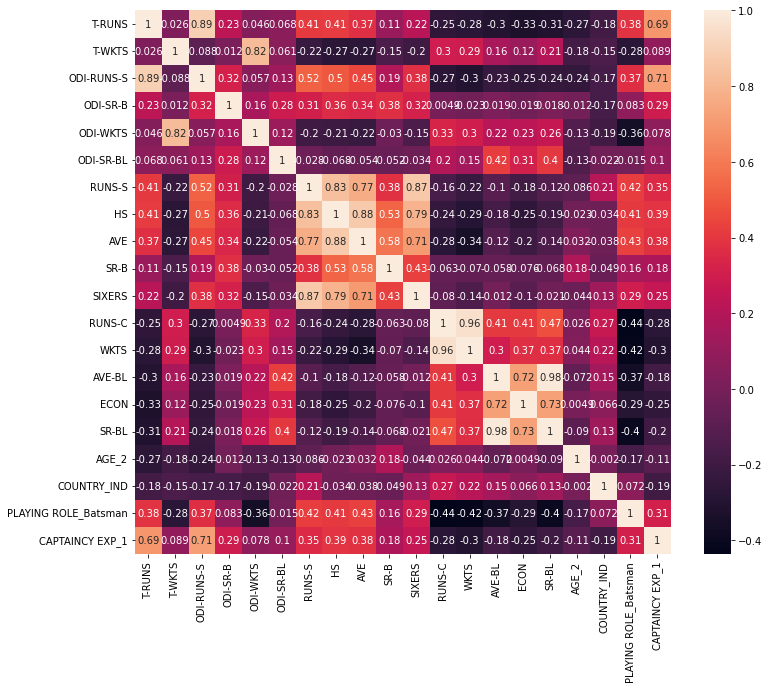

In [24]:
plt.figure(figsize = (12, 10))
sn.heatmap(X[columns_with_large_vif].corr(), annot = True)

In [25]:
# 1. T-RUNS and ODI-RUNS are highly correlated, wheras ODI-WKTS and T-WKTS are highly correlated
# 2. Batsman features like RUNS-S, HS, AVE, SIXERS are highly correlated, 
# bowler's features like AVE-BL, ECON and SR-BL are highly correlated

In [26]:
# Remove some features
columns_to_be_removed = ['T-RUNS', 'T-WKTS', 'RUNS-S', 'HS', 'AVE', 'RUNS-C', 
                         'SR-B', 'AVE-BL', 'ECON', 'ODI-SR-B', 'ODI-RUNS-S', 'AGE_2', 'SR-BL']


In [27]:
X_new_features = list( set(X_features) - set(columns_to_be_removed) )

In [28]:
get_vif_factors(X[X_new_features])

,column,vif
0,COUNTRY_IND,3.144668
1,COUNTRY_ENG,1.131869
2,SIXERS,2.397409
3,COUNTRY_BAN,1.094293
4,COUNTRY_ZIM,1.205305
5,PLAYING ROLE_Bowler,3.060168
6,COUNTRY_PAK,1.334773
7,PLAYING ROLE_Batsman,2.680207
8,COUNTRY_NZ,1.173418
9,ODI-WKTS,2.742889


In [29]:
train_X = train_X[X_new_features]

ipl_model_2 = sm.OLS(train_y, train_X).fit()

In [30]:
ipl_model_2.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                            Results: Ordinary least squares
========================================================================================
Model:                      OLS                Adj. R-squared (uncentered):   0.728     
Dependent Variable:         SOLD PRICE         AIC:                           2965.1080 
Date:                       2022-09-22 13:49   BIC:                           3012.7070 
No. Observations:           104                Log-Likelihood:                -1464.6   
Df Model:                   18                 F-statistic:                   16.49     
Df Residuals:               86                 Prob (F-statistic):            1.13e-20  
R-squared (uncentered):     0.775              Scale:                         1.2071e+11
----------------------------------------------------------------------------------------
                          Coef.       Std.Err.     t    P>|t|     [0.025       0.975]   
----------------------------------------------------------------------------------------
COUNTRY_IND             282829.8091  96188.0292  2.9404 0.0042   91614.3356  474045.2827
COUNTRY_ENG             682934.7166 216150.8279  3.1595 0.0022  253241.0920 1112628.3411
SIXERS                    7862.1259   2086.6101  3.7679 0.0003    3714.0824   12010.1694
COUNTRY_BAN            -108758.6040 369274.1916 -0.2945 0.7691 -842851.4010  625334.1930
COUNTRY_ZIM             -67977.6781 390859.9289 -0.1739 0.8623 -844981.5006  709026.1444
PLAYING ROLE_Bowler     -18315.4968 106035.9664 -0.1727 0.8633 -229108.0215  192477.0279
COUNTRY_PAK             122810.2480 159600.8063  0.7695 0.4437 -194465.6541  440086.1502
PLAYING ROLE_Batsman    121382.0570 106685.0356  1.1378 0.2584  -90700.7746  333464.8886
COUNTRY_NZ              142968.8843 151841.7382  0.9416 0.3491 -158882.5009  444820.2695
ODI-WKTS                   772.4088    470.6354  1.6412 0.1044    -163.1834    1708.0009
COUNTRY_WI              -22234.9315 213050.5847 -0.1044 0.9171 -445765.4766  401295.6135
ODI-SR-BL                  909.0021   1267.4969  0.7172 0.4752   -1610.6983    3428.7026
COUNTRY_SA              108735.9086 115092.9596  0.9448 0.3474 -120061.3227  337533.1399
COUNTRY_SL               55912.3398 142277.1829  0.3930 0.6953 -226925.3388  338750.0184
PLAYING ROLE_W. Keeper  -55121.9240 169922.5271 -0.3244 0.7464 -392916.7280  282672.8801
CAPTAINCY EXP_1         208376.6957  98128.0284  2.1235 0.0366   13304.6315  403448.7600
AGE_3                    -8950.6659  98041.9325 -0.0913 0.9275 -203851.5772  185950.2453
WKTS                      2431.8988   2105.3524  1.1551 0.2512   -1753.4033    6617.2008
----------------------------------------------------------------------------------------
Omnibus:                       8.635               Durbin-Watson:                  2.252
Prob(Omnibus):                 0.013               Jarque-Bera (JB):               8.345
Skew:                          0.623               Prob(JB):                       0.015
Kurtosis:                      3.609               Condition No.:                  1492 
========================================================================================
* The condition number is large (1e+03). This might indicate             strong
multicollinearity or other numerical problems.
"""

In [31]:
# CAPTAINCY EXP_1, COUNTRY_IND, COUNTRY_ENG, SIXERS
# are statistically significant features in predicting SOLD PRICE

In [32]:
significant_vars = ['CAPTAINCY EXP_1', 'COUNTRY_IND', 'COUNTRY_ENG', 'SIXERS']

train_X = train_X[significant_vars]

ipl_model_3 = sm.OLS(train_y, train_X).fit()
ipl_model_3.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                        Results: Ordinary least squares
================================================================================
Model:                  OLS              Adj. R-squared (uncentered): 0.704     
Dependent Variable:     SOLD PRICE       AIC:                         2961.8089 
Date:                   2022-09-22 13:49 BIC:                         2972.3864 
No. Observations:       104              Log-Likelihood:              -1476.9   
Df Model:               4                F-statistic:                 62.77     
Df Residuals:           100              Prob (F-statistic):          1.97e-26  
R-squared (uncentered): 0.715            Scale:                       1.3164e+11
--------------------------------------------------------------------------------
                     Coef.      Std.Err.    t    P>|t|     [0.025      0.975]   
--------------------------------------------------------------------------------
CAPTAINCY EXP_1   359725.2741  74930.3460 4.8008 0.0000 211065.6018  508384.9463
COUNTRY_IND       387890.2538  63007.1511 6.1563 0.0000 262885.8606  512894.6471
COUNTRY_ENG       731833.6386 214164.4988 3.4172 0.0009 306937.3727 1156729.9045
SIXERS              8637.8344   1675.1313 5.1565 0.0000   5314.4216   11961.2472
--------------------------------------------------------------------------------
Omnibus:                   1.130             Durbin-Watson:                2.238
Prob(Omnibus):             0.568             Jarque-Bera (JB):             0.874
Skew:                      0.223             Prob(JB):                     0.646
Kurtosis:                  3.046             Condition No.:                165  
================================================================================

"""

# Residual Analysis of Multiple Linear Regression model

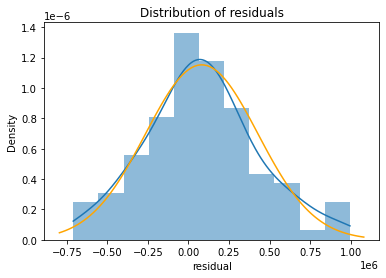

In [33]:
# histogram of the residuals with comparision of the distribution with standard normal distribution

from scipy import stats
mu, std = stats.norm.fit(ipl_model_3.resid)

fig, ax = plt.subplots()
# plot the residuals
sn.histplot(x=ipl_model_3.resid, ax=ax, stat="density", linewidth=0, kde=True)
ax.set(title="Distribution of residuals", xlabel="residual")

# plot corresponding normal curve
xmin, xmax = plt.xlim() # the maximum x values from the histogram above
x = np.linspace(xmin, xmax, 100) # generate some x values
p = stats.norm.pdf(x, mu, std) # calculate the y values for the normal curve
sn.lineplot(x=x, y=p, color="orange", ax=ax)
plt.show()

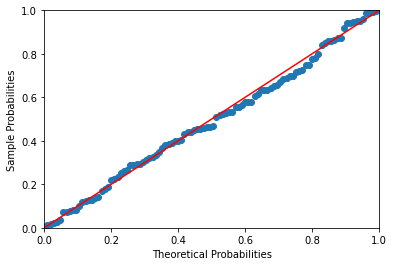

In [34]:
sm.ProbPlot(ipl_model_3.resid, fit = True).ppplot(line='45');

In [35]:
# important assumption in Linear regression - residuals have constant variance

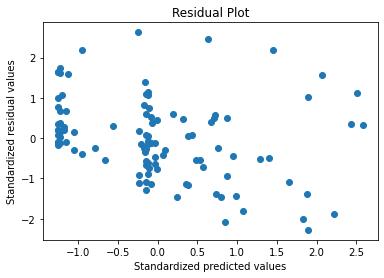

In [36]:
# Homoscedasticity
def get_standardized_values( vals ):
    return (vals - vals.mean())/vals.std()

def plot_resid_fitted( fitted, resid, title):
    plt.scatter( get_standardized_values( fitted ),get_standardized_values( resid ) )
    plt.title( title )
    plt.xlabel( "Standardized predicted values")
    plt.ylabel( "Standardized residual values")
    plt.show()

plot_resid_fitted( ipl_model_3.fittedvalues,ipl_model_3.resid,"Residual Plot")


In [37]:
# identify highly influential observations
# Leverage values >  3(k+1)/n - the data points are treated as highly influential observations

In [38]:
k = train_X.shape[1]
n = train_X.shape[0]

print("Number of Vars: ", k, " and No. of data points is: ", n)

Number of Vars:  4  and No. of data points is:  104


In [39]:
leverage_cutoff = 3*((k+1)/n)
print("Cutoff for leverage values: ", round(leverage_cutoff, 3))

Cutoff for leverage values:  0.144


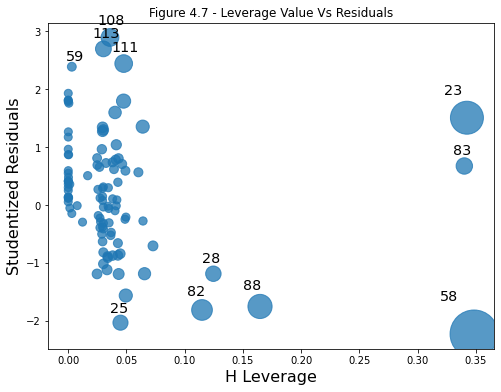

In [40]:
from statsmodels.graphics.regressionplots import influence_plot
fig, ax = plt.subplots( figsize=(8,6) )
influence_plot( ipl_model_3, ax = ax )
plt.title( "Figure 4.7 - Leverage Value Vs Residuals")
plt.show()

# 23, 58, 83 have comparitively high leverage with residuals


In [41]:
# we can filter out influencial observations
ipl_auction_df[ipl_auction_df.index.isin( [23, 58, 83] )]

,Sl.NO.,PLAYER NAME,AGE,...,AUCTION YEAR,BASE PRICE,SOLD PRICE
23,24,"Flintoff, A",2,...,2009,950000,1550000
58,59,"Mascarenhas, AD",2,...,2011,100000,100000
83,84,"Pietersen, KP",2,...,2009,1350000,1550000


In [42]:
# These observations do not have high residuals. So, may not be necessary to remove.
# if the rows has to be removed:
#train_X_new = train_X.drop( [23, 58, 83], axis = 0)
#train_y_new = train_y.drop( [23, 58, 83], axis = 0)

# Transforming Response Variable

In [43]:
#Transformation in MLR is used to address the following issues:

#1. Poor fit (low R-sqr value)
#2. potential non-linear relationship
#3. Residuals do not follow a normal distribution
#4. Not homoscedastic

In [44]:
train_y = np.sqrt(train_y)

In [45]:
ipl_model_4 = sm.OLS(train_y, train_X).fit()
ipl_model_4.summary2()


<class 'statsmodels.iolib.summary2.Summary'>
"""
                        Results: Ordinary least squares
================================================================================
Model:                  OLS              Adj. R-squared (uncentered): 0.741     
Dependent Variable:     SOLD PRICE       AIC:                         1527.9999 
Date:                   2022-09-22 13:49 BIC:                         1538.5775 
No. Observations:       104              Log-Likelihood:              -760.00   
Df Model:               4                F-statistic:                 75.29     
Df Residuals:           100              Prob (F-statistic):          2.63e-29  
R-squared (uncentered): 0.751            Scale:                       1.3550e+05
-----------------------------------------------------------------------------------
                    Coef.      Std.Err.      t       P>|t|      [0.025      0.975] 
-----------------------------------------------------------------------------------
CAPTAINCY EXP_1    417.7575     76.0204    5.4953    0.0000    266.9352    568.5799
COUNTRY_IND        490.7089     63.9238    7.6765    0.0000    363.8860    617.5318
COUNTRY_ENG        563.0261    217.2801    2.5912    0.0110    131.9486    994.1036
SIXERS               8.5338      1.6995    5.0213    0.0000      5.1620     11.9055
--------------------------------------------------------------------------------
Omnibus:                   0.017             Durbin-Watson:                1.879
Prob(Omnibus):             0.992             Jarque-Bera (JB):             0.145
Skew:                      0.005             Prob(JB):                     0.930
Kurtosis:                  2.817             Condition No.:                165  
================================================================================

"""

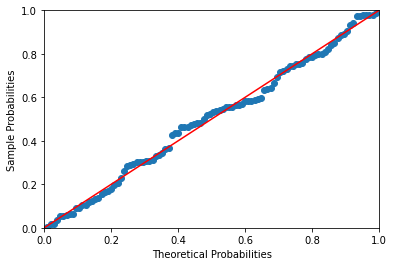

In [46]:
sm.ProbPlot(ipl_model_4.resid, fit = True).ppplot(line='45');

# Making predictions on Validation Set

In [47]:
pred_y = np.power(ipl_model_4.predict(test_X[train_X.columns]), 2)

In [48]:
from sklearn import metrics
np.sqrt(metrics.mean_squared_error(pred_y, test_y))


496151.1812255798

In [49]:
#Measuring R-squared value
np.round( metrics.r2_score(pred_y, test_y), 2 )


0.44